In [1]:
import dataclasses
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from solution_1 import State

# Function to visualize the array with pointers
def visualize_array_with_pointers(states: List[State]):

    for iter, state in enumerate(states, 1):
        arr, pointer1_pos, pointer2_pos, output = dataclasses.astuple(state)

        plt.figure(figsize=(10, 3))
        
        # Draw array boxes
        for i in range(len(arr)):
            plt.gca().add_patch(plt.Rectangle(((i-1)*0.5, 0), 0.5, 1, linewidth=1, edgecolor='black', facecolor='none'))
            plt.text((i-1)*0.5 + 0.25, 0.5, str(arr[i]), ha='center', va='center')

        # Calculate the position for the pointer labels
        label_pos = (pointer1_pos + pointer2_pos) / 2 + 0.5

        plt.text(1.5, 1.6, f'output={output}', style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

        pointer1_pos -= 1
        pointer2_pos -= 1
        is_same_pos = 0.1 if pointer1_pos==pointer2_pos else 0

        # Plot pointer 1
        plt.arrow(pointer1_pos*0.5 + 0.25 + is_same_pos, 1.2, 0, -0.3, head_width=0.1, head_length=0.1, fc='red', ec='red')
        plt.text(pointer1_pos*0.5 + 0.25 + is_same_pos, 1.25, 'Pnt 1', ha='center', va='center')

        # Plot pointer 2
        plt.arrow(pointer2_pos*0.5 + 0.25 - is_same_pos, 1.2, 0, -0.3, head_width=0.1, head_length=0.1, fc='green', ec='green')
        plt.text(pointer2_pos*0.5 + 0.25 - is_same_pos, 1.25, 'Pnt 2', ha='center', va='center')

        plt.title(f'[Question 1] Iteration {iter}')
        plt.xlabel('Index')
        plt.xlim(-0.5, len(arr)*0.5)
        plt.ylim(0, 2)
        plt.xticks(np.arange(len(arr))*0.5 + 0.25, [])
        plt.yticks([])
        plt.grid(False)
        plt.show()

### 2 State variables
- start_idx >> Keep point at the start of series position
- end_idx >> Keep moving and check if a value still satisfy series requirement 

## Pseudo code
- given input array `input`
- given output array `output`
- check if size = 0
  - > return empty array
- sort A
- initial 2 pointer `start_idx` at position 0, and `end_idx` at 1 
- while the `end_idx` is still in range of array `input`
  - check if value at `end_idx` position is not equals to value at `end_idx`-1 position + 1
    - save the (Pnt1, Pnt2) to `output` because it's not a serie
    - reset position of `start_idx` to `end_idx`
  - move `end_idx` by 1
- save the (`start_idx`, `end_idx`) to O
- > return O

[[1, 1], [3, 5], [7, 7]]


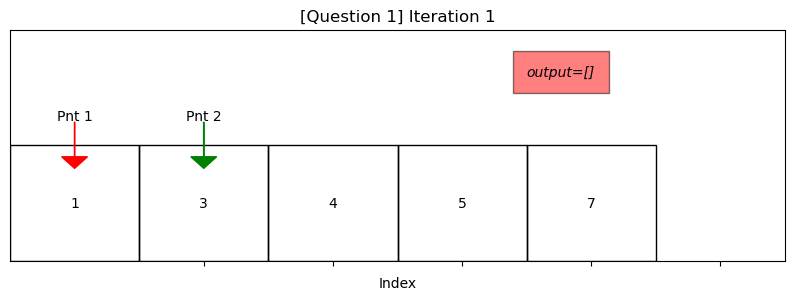

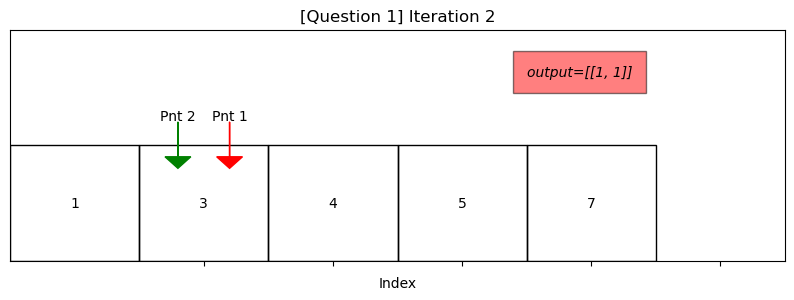

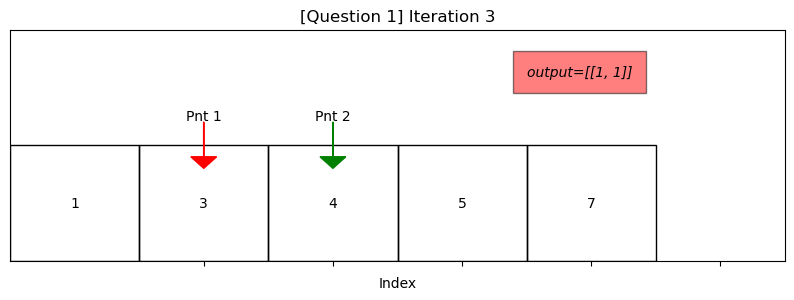

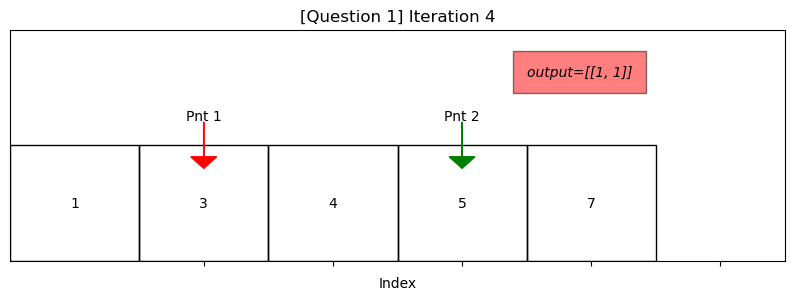

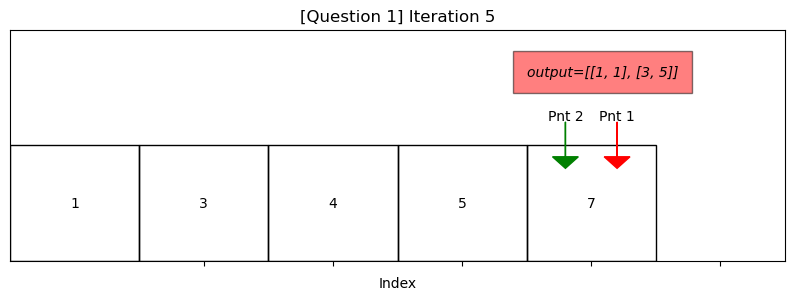

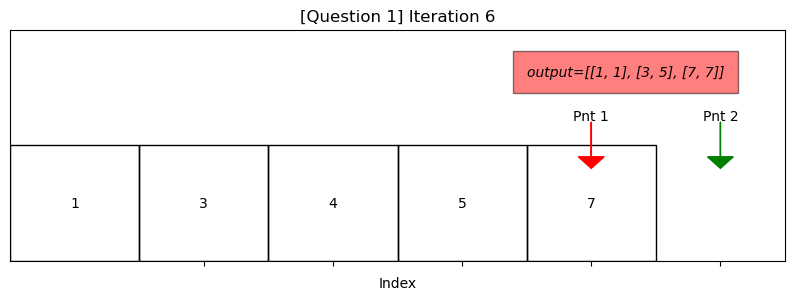

In [3]:
import solution_1

answer, states = solution_1.solve([1,3,4,5,7])
print(answer)

visualize_array_with_pointers(states)